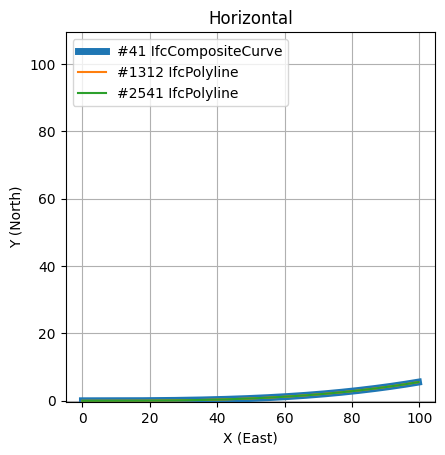

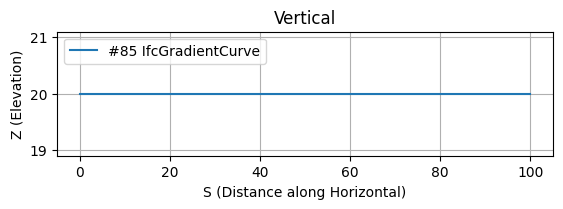

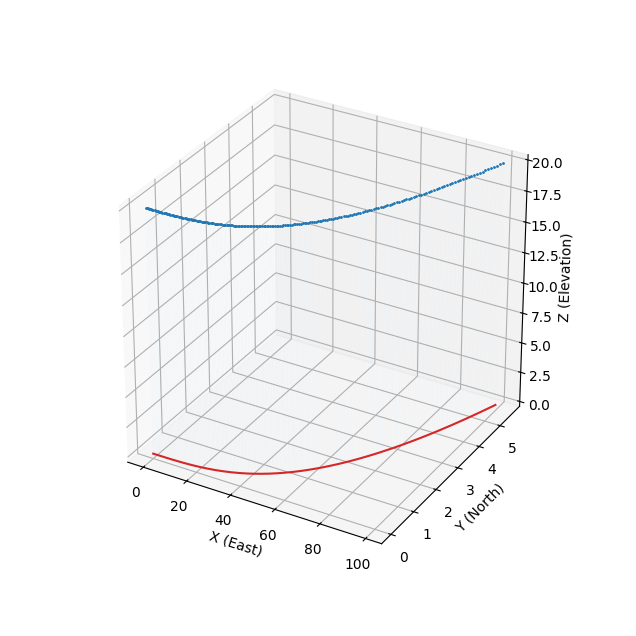

In [13]:
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.ifcopenshell_wrapper as wrapper
import numpy as np
import matplotlib.pyplot as plt
import math
import ifcopenshell.api.alignment

model = ifcopenshell.open("C:\\Users\\rickb\\OneDrive - Washington State Department of Transportation\\BIM Fit Check\\TS1_horizontal_vertical_check.ifc")

settings = geom.settings()

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure(figsize=(8,8)).add_subplot(projection="3d")

hcurves = model.by_type("IfcCompositeCurve",False)
for hc in hcurves:
    shape = geom.create_shape(settings,hc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    fig1.plot(x,y,linewidth=5,label="#" + str(hc.id())+" "+hc.is_a())
    
polylines = model.by_type("IfcPolyline")
for polyline in polylines:
    shape = geom.create_shape(settings,hc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    dir(polyline)
    fig1.plot(x,y,label="#" + str(polyline.id()) + " " + polyline.is_a())


curves = model.by_type("IfcGradientCurve",False)
for gc in curves:
    gradient_curve = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,gc.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(settings,gradient_curve)
    distances = evaluator.evaluation_points()
    
    shape = geom.create_shape(settings,gc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    
    #fig1.plot(x,y,label="#" + str(gc.id()))
    fig2.plot(distances,z,label="#" + str(gc.id()) + " " + gc.is_a())
    
    markerline, stemline, baseline = fig3.stem(x,y,z)
    plt.setp(stemline,linewidth=0.01)
    plt.setp(stemline,linestyles="dashed")
    plt.setp(markerline,markersize=1)


fig1.set_title("Horizontal")
fig1.legend(loc="upper left")
fig1.axis("square")
fig1.set_aspect('equal',adjustable='box')
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)

fig2.set_title("Vertical")
fig2.legend(loc="upper left")
fig2.set_xlabel("S (Distance along Horizontal)")
fig2.set_ylabel("Z (Elevation)")
fig2.set_box_aspect(0.25)
fig2.grid(True)

#fig3.set_title("IfcGradientCurve")
#fig3.legend()
#fig3.axis("square")
fig3.set_xlabel("X (East)")
fig3.set_ylabel("Y (North)")
fig3.set_zlabel("Z (Elevation)")
fig3.grid(True)
fig3.set_box_aspect([1,1,1],zoom=0.8)
#fig3.set_box_aspect(aspect=None,zoom=0.8)

#plt.savefig("Alignment.png")
plt.show()
